# Competition 2 
## Name: **OyWithThePoodles**
----------------------------------------------------
## Results: 

------MODEL1.-------

*Lasso Regression* 

MSE for Lasso CV:  1.0902123698310913 

R2 for Lasso CV:  0.15612563827805748 

------MODEL2.-------

*Lasso Regression with Alpha 0.01 and feature Selection performed* 

MSE for Lasso with alpha  0.01  is:  1.0335518698441815 

R2 for Lasso with alpha  0.01 is:  0.19998346321606242 


------MODEL3.-------

*Lass Regression with Multilasso cross validation after adding non-linear and interaction terms* 

MSE for MultiLasso CV:  1.0130762252428338

R2 for MultiLasso CV:  0.21583255096901532 


------MODEL4.-------

MSE for MultiLasso CV w/ 11 features:  1.0104868222922274

R2 for MultiLasso CV w/ 11 features:  0.21783686757984444


**.::MODEL I'M PRESENTING::.**

------------------------------

#### Model 4

**MSE:** 1.01 

**R2 :** 0.22 

**Multilasso cv non linear & 11 features score for train set**:  0.25826562010269694


|MODEL|MSE|R2| 
|------|------|------|
|1-Lasso|1.09|16%|
|2-Lasso&FeatureSelect|1.03|20%| 
|3-MultiLasso,NonLin,Interaction|1.01|22%|
|*4-MultiLasso,NonLin,Interaction,11|1.01|22%|

To Do 

1. S1 - Algorithm for Q1, Answer Q2 
2. S2 - R-squared, MSE for Test and Train Set
        name, code for Q1 answer 
        
3. Q1. Lasso + Ridge Regression 
       predict housing values
       (ok to add interaction terms and non-linearity)

4. Q2. Graphical illustration of relative importance of different features in final model
       "training data" 
       **report figure in the results**
      

# PART 1 - Q1 

In [1]:
#load dataset 
import pandas as pd 

dataset = pd.read_csv('trainset.csv')
dataset.head()

,LOGVALUE,BATHS,BEDRMS,BUILT,UNITSF,LOT,ROOMS,REGION,KITCHEN,FLOORS,LAUNDY,RECRM,METRO,METRO3
0,12.899220,2,3,2001,1531.0,2712.0,6,4,1,2,0,0,7,2
1,11.225243,1,3,1975,1125.0,11000.0,5,3,1,1,0,0,1,1
2,11.561716,2,3,1995,1300.0,44000.0,5,3,1,1,0,0,7,2
3,13.122363,4,5,2001,8299.0,11000.0,11,4,1,2,0,0,7,2
4,11.891362,2,4,1990,1200.0,11000.0,7,2,1,4,0,0,7,2


In [2]:
#information about dataset 

print("info: ", dataset.info())
print("description: ", dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOGVALUE  19999 non-null  float64
 1   BATHS     19999 non-null  int64  
 2   BEDRMS    19999 non-null  int64  
 3   BUILT     19999 non-null  int64  
 4   UNITSF    19999 non-null  float64
 5   LOT       19999 non-null  float64
 6   ROOMS     19999 non-null  int64  
 7   REGION    19999 non-null  int64  
 8   KITCHEN   19999 non-null  int64  
 9   FLOORS    19999 non-null  int64  
 10  LAUNDY    19999 non-null  int64  
 11  RECRM     19999 non-null  int64  
 12  METRO     19999 non-null  int64  
 13  METRO3    19999 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.1 MB
info:  None
description:             LOGVALUE         BATHS        BEDRMS         BUILT        UNITSF  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.000000   
mean      12.054003      1.91519

based on the information about the dataset: 
 - no null values 
 - 14 columns 
 - all are numerical values 
 - 19999 datapoints 


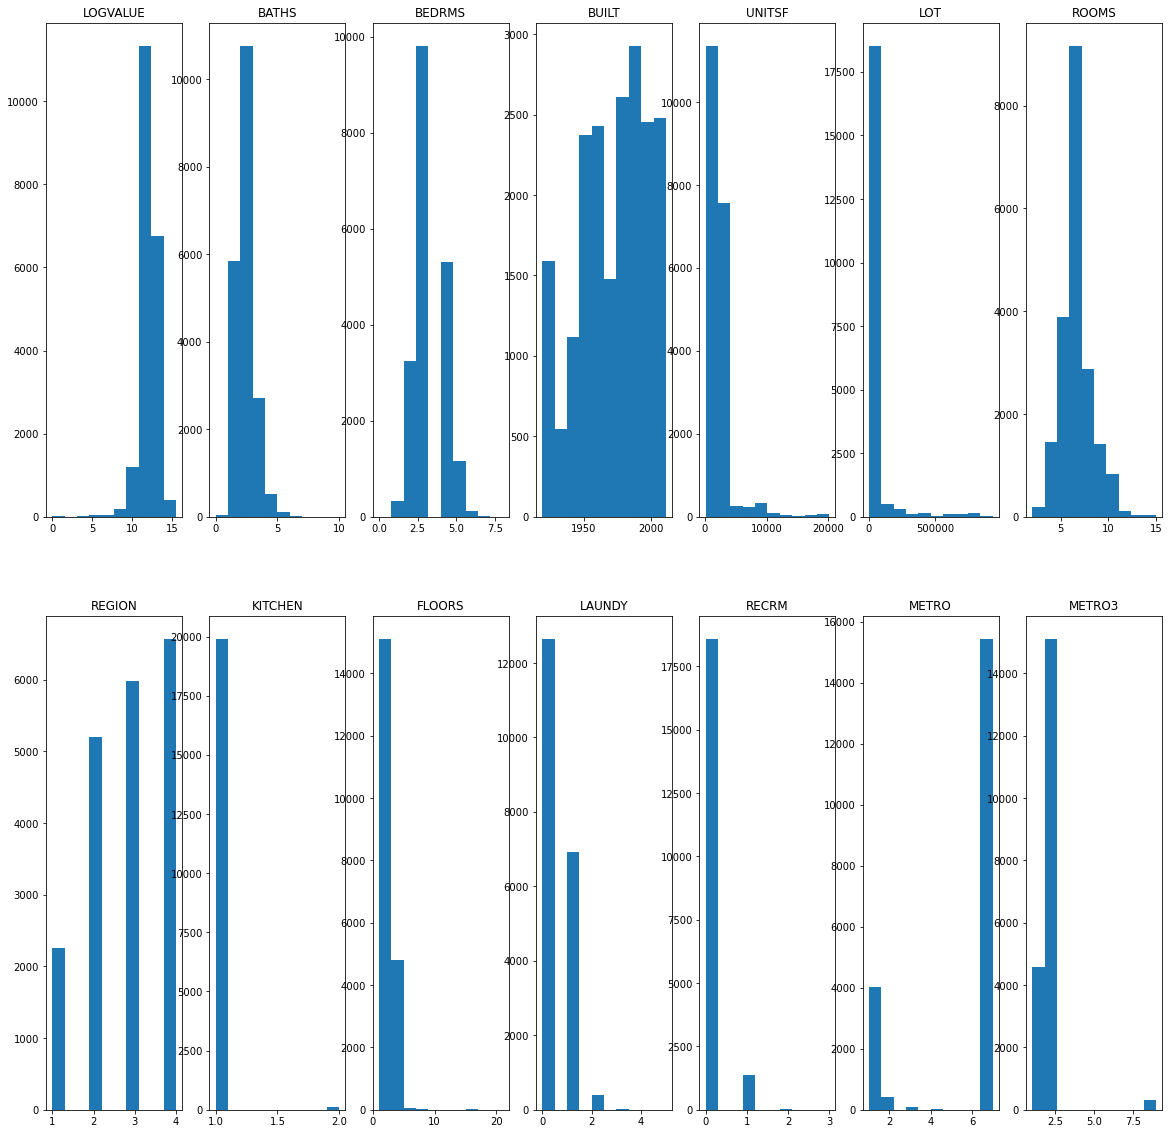

In [3]:
#clean dataset
#preprocessing
#visualizations 

%matplotlib inline 
import matplotlib.pyplot as plt 

fig_size = (20,20)
fig = plt.figure(figsize = fig_size)
grid = fig.add_gridspec(2,7)

def draw(dx, t, f, lx, ly):
    ax = f.add_subplot(grid[lx, ly])
    ax.hist(dx)
    ax.set(title = t)
    return f

locations = [[0,0],[0,1],[0,2],[0,3],[0,4],[0,5],[0,6],[1,0],[1,1],[1,2],[1,3],[1,4],[1,5],[1,6]]
col_list = list(dataset.columns)

for col in col_list:
    draw(dataset[col], col, fig, locations[col_list.index(col)][0], locations[col_list.index(col)][1])

#     for j in range(len(locations)):
#         draw(dataset[col], col, fig, locations[j][0], locations[j][1])

plt.show()


Seems that: 

    - Most houses are expensive (or above average) as LOGVALUE is skewed to the left (most datapoints are in the right hand side of mean)
    - Most houess have less than 5 baths 
    - Bedroom is split in 2 so it's a multimodial (bimodial in this case) distribution 
    - Built has no particular pattern 
    - Number of rooms is normal 
    - Kitcken is pretty much uniform 
    

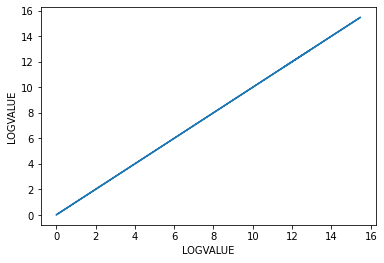

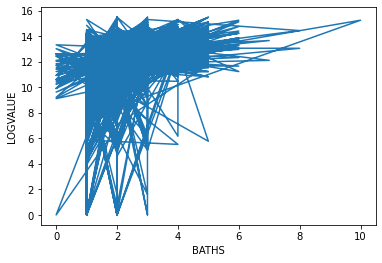

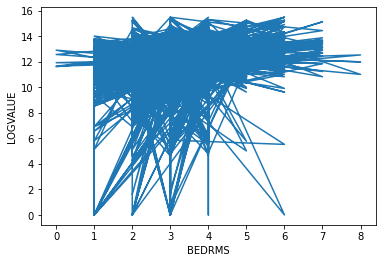

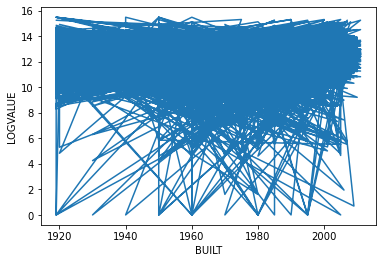

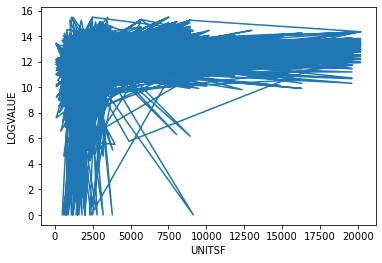

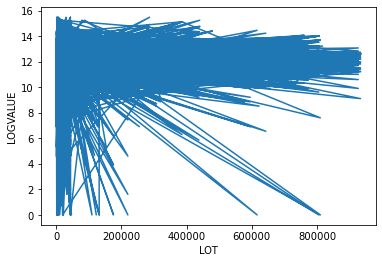

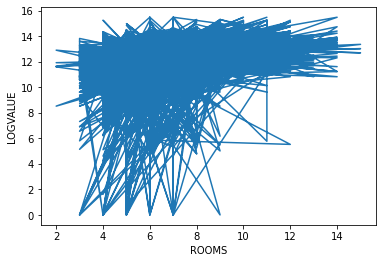

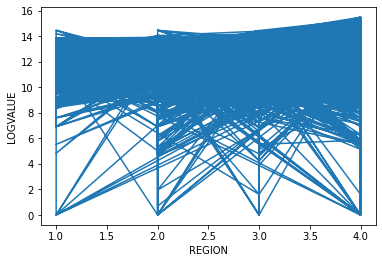

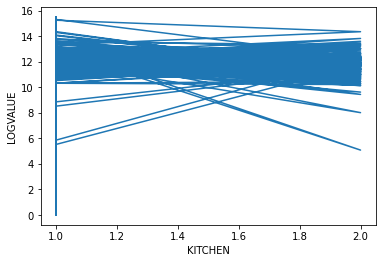

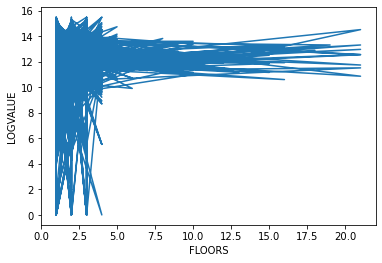

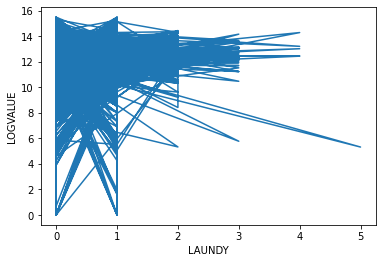

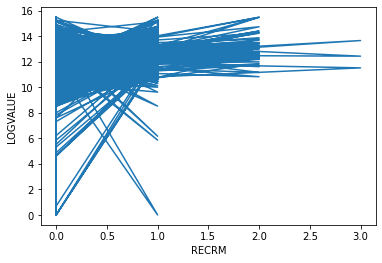

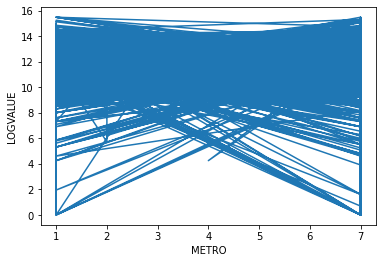

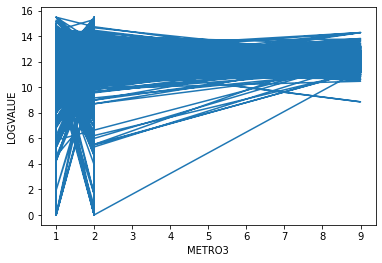

In [4]:
#plotting all values against LOGVALUE to see if I can notice very visible patterns 
# no transforms here 

for col in col_list:
    plt.plot(dataset[col], dataset['LOGVALUE'])
    plt.xlabel(col)
    plt.ylabel('LOGVALUE')
    plt.show()

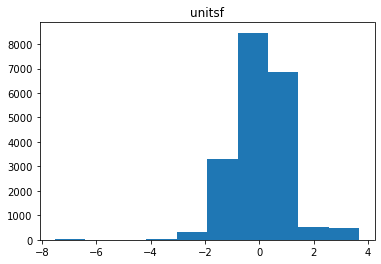

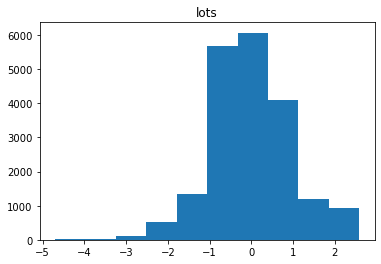

In [5]:
#let's do some transforms and see if this changes 

#BATH, UNITSF, LOTS, FLOORS, LAUNDRY
#BEDRMS RobustScaler

       
from sklearn.preprocessing import Normalizer 
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import PowerTransformer

t1 = PowerTransformer()
t2 = RobustScaler()

#numpy it up
import numpy as np 

bath = np.array(dataset['BATHS'])
unitsf = np.array(dataset['UNITSF'])
lots = np.array(dataset['LOT'] )
floors = np.array(dataset['FLOORS'])
laundry = np.array(dataset['LAUNDY'])
bedrooms = np.array(dataset['BEDRMS'])

unitsf = t1.fit(unitsf.reshape(-1,1)).transform(unitsf.reshape(-1,1))
lots = t1.fit(lots.reshape(-1,1)).transform(lots.reshape(-1,1))

normed_cols = [unitsf, lots]
names = ['unitsf', 'lots']


#histogram plots 
for i in range(len(normed_cols)):
    plt.hist(normed_cols[i])
    plt.title(names[i])
    plt.show()

I ended up just going with Tableau and checked the relationships there: 

    **Findings are:**
    -- Kind of a positive linear relationship with Rooms
    -- No linear relationship with UNITSF, LOT, Floors, bedrooms
    -- No relationship at all with Region, Recrooms, Metro3, Metro, kitchen, built
    -- no relationship then negative relationship with LANDRY
    

In [6]:
#what I am choosing to work on out of all the features based on this first analysis: 

x_rooms = np.array(dataset['ROOMS'])
x_baths = np.array(dataset['BATHS'])
x_unit_nl = unitsf
x_lot_nl = lots
x_floor_nl = np.array(dataset['FLOORS'])
x_bedr_nl = np.array(dataset['BEDRMS'])
x_land_ques = np.array(dataset['LAUNDY'])

#we have y for target value 

#put all x's in a dataframe 
x_np = np.concatenate((x_rooms.reshape(-1,1), x_baths.reshape(-1,1), x_unit_nl.reshape(-1,1), x_lot_nl.reshape(-1,1), x_floor_nl.reshape(-1,1), x_bedr_nl.reshape(-1,1), x_land_ques.reshape(-1,1)), axis=1)
x_df = pd.DataFrame(x_np, columns = ['Rooms', 'Baths', 'UNITSF', 'LOT', 'FLOORS', 'BEDROOMS', 'LAUNDRY'])

x_df.head()


,Rooms,Baths,UNITSF,LOT,FLOORS,BEDROOMS,LAUNDRY
0,6.0,2.0,-0.446943,-1.462936,2.0,3.0,0.0
1,5.0,1.0,-1.081004,-0.162017,1.0,3.0,0.0
2,5.0,2.0,-0.779099,0.891035,1.0,3.0,0.0
3,11.0,4.0,2.466481,-0.162017,2.0,5.0,0.0
4,7.0,2.0,-0.945265,-0.162017,4.0,4.0,0.0


In [7]:
#cross validation 
from sklearn.model_selection import train_test_split

y = np.array(dataset['LOGVALUE'])
x_train, x_val, y_train, y_val = train_test_split(x_df, y, test_size = 0.3, random_state=0)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)


(13999, 7)
(6000, 7)
(13999,)
(6000,)


In [8]:
#Lasso Regression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

def pickAlpha(x, y):
    """
    Pass X values and Y values
    Function will return the best alpha 
    That produces the lowest Absolute error  
    """
    scores = []
    
    model = Lasso()
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid = dict()
    grid['alpha'] = np.arange(0, 1, 0.01)
    search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    results = search.fit(x, y)
    print('MSE: %.3f' % results.best_score_)
    print('Config: %s' % results.best_params_)
    
pickAlpha(x_train, y_train)

MSE: -0.940
Config: {'alpha': 0.0}


C:\Users\yamirkha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\yamirkha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\yamirkha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6569.1023043086225, tolerance: 1.6140697260675139
  model = cd_fast.enet_coordinate_descent(


In [9]:
#train Lasso model with 0.01 Alpha 

def lasso_alpha(x, y, x_v, y_v, a):
    lasso_model = Lasso(alpha = a)
    lasso_model.fit(x, y)

    #predictions 
    lasso_pred = lasso_model.predict(x_v)

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score

    mse = mean_squared_error(y_v, lasso_pred)
    r2 = r2_score(y_v, lasso_pred)

    print("MSE for Lasso with alpha ", a, " is: ", mse)
    print("R2 for Lasso with alpha ", a, "is: ", r2)
    
lasso_alpha(x_train, y_train, x_val, y_val, 0.01)

MSE for Lasso with alpha  0.01  is:  1.0908341949239622
R2 for Lasso with alpha  0.01 is:  0.1556443171447901


In [10]:
#using LassoCV for alpha: 
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def lasso_cv_func(x, y, x_v, y_v):
    lasso_cv = LassoCV(cv = 5, random_state = 42).fit(x, y)
    print("lasso cv score for train set: ", lasso_cv.score(x, y))
    print("lasso cv score for validation set: ", lasso_cv.score(x_v, y_v))

    lasso_cv_pred = lasso_cv.predict(x_v)
    mse_lassoCv = mean_squared_error(y_v, lasso_cv_pred)
    r2_lassoCv = r2_score(y_v, lasso_cv_pred)

    print("MSE for Lasso CV: ", mse_lassoCv)
    print("R2 for Lasso CV: ", r2_lassoCv)

lasso_cv_func(x_train, y_train, x_val, y_val)

lasso cv score for train set:  0.18601640794674068
lasso cv score for validation set:  0.15612563827805748
MSE for Lasso CV:  1.0902123698310913
R2 for Lasso CV:  0.15612563827805748


In [11]:
#Feature Selection

#Backward (Recursive) --- we have 13 features, I can do this for different number of k's and check the MSE of the regression 
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

def make_models(typ):
    """
    Use RFE to build different models with different numbers of features 
    Returns a dictionary of all the different models 
    """
    if typ == 1: 
        #there are only 7 features to choose from to begin with 
        models = dict()
        for i in range(1,7):
            rfe = RFE(estimator = Lasso(), n_features_to_select = i)
            model = Lasso(alpha=0.01)
            models[str(i)] = Pipeline(steps = [('s', rfe),('m', model)])
    else:
        models = dict()
        for i in range(1,14):
            #all 13 are considered here 
            rfe = RFE(estimator = Lasso(), n_features_to_select = i)
            model = Lasso(alpha=0.01)
            models[str(i)] = Pipeline(steps = [('s', rfe),('m', model)])
    
    return models 
 
def evaluate_model(model, x, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    scores = np.absolute(scores)
    
    return scores
    
models = make_models(1)
models2 = make_models(2)
results = []
results2 = []
model_name = []
model_names2 = []

print("For new dataset:")
for name, model in models.items():
    scores = evaluate_model(model, x_df, y)
    results.append(scores)
    model_name.append(name)
    
    
    print("Model %s has MSE of %.3f" %(name, np.mean(scores)))

xs = dataset[['BATHS','BEDRMS','BUILT','UNITSF','LOT','ROOMS','REGION','KITCHEN','FLOORS','LAUNDY','RECRM','METRO','METRO3']]
xs = np.array(xs)

print("Considering All features:")
for name, model in models2.items():
    scores2 = evaluate_model(model, xs, y)
    results2.append(scores)
    model_names2.append(name)
    
    
    print("Model %s has MSE of %.3f" %(name, np.mean(scores2)))




For new dataset:
Model 1 has MSE of 1.187
Model 2 has MSE of 1.081
Model 3 has MSE of 1.075
Model 4 has MSE of 1.073
Model 5 has MSE of 1.039
Model 6 has MSE of 0.996
Considering All features:
Model 1 has MSE of 1.179
Model 2 has MSE of 1.126
Model 3 has MSE of 1.125
Model 4 has MSE of 1.125
Model 5 has MSE of 1.125
Model 6 has MSE of 1.123
Model 7 has MSE of 1.122
Model 8 has MSE of 1.115
Model 9 has MSE of 1.115
Model 10 has MSE of 1.017
Model 11 has MSE of 0.940
Model 12 has MSE of 0.940
Model 13 has MSE of 0.924


Based on the results from above:

For new dataset:
**Model 6 has MSE of 0.996**


Considering All features:
**Model 13 has MSE of 0.924**

In [12]:
#then train Lasso Regression using all 13 features.

x_train_all, x_val_all, y_train_all, y_val_all = train_test_split(xs, y, test_size=0.3, random_state=0)

lasso_cv_func(x_train_all, y_train_all, x_val_all, y_val_all)

print("Calculating Alpha for Lasso and Running it:")

pickAlpha(x_train_all, y_train_all)
lasso_alpha(x_train_all, y_train_all, x_val_all, y_val_all, 0.01)

lasso cv score for train set:  0.06050392309669306
lasso cv score for validation set:  0.053037564395589376
MSE for Lasso CV:  1.2233932062525206
R2 for Lasso CV:  0.053037564395589376
Calculating Alpha for Lasso and Running it:
MSE: -0.876
Config: {'alpha': 0.0}
MSE for Lasso with alpha  0.01  is:  1.0335518698441815
R2 for Lasso with alpha  0.01 is:  0.19998346321606242


C:\Users\yamirkha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\yamirkha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\yamirkha\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6118.973656469208, tolerance: 1.6140697260675139
  model = cd_fast.enet_coordinate_descent(


This time, my own function with alpha 0.01 does better: 

MSE for Lasso with Alpha 0.01 is: 1.03

R2 is: 20% 



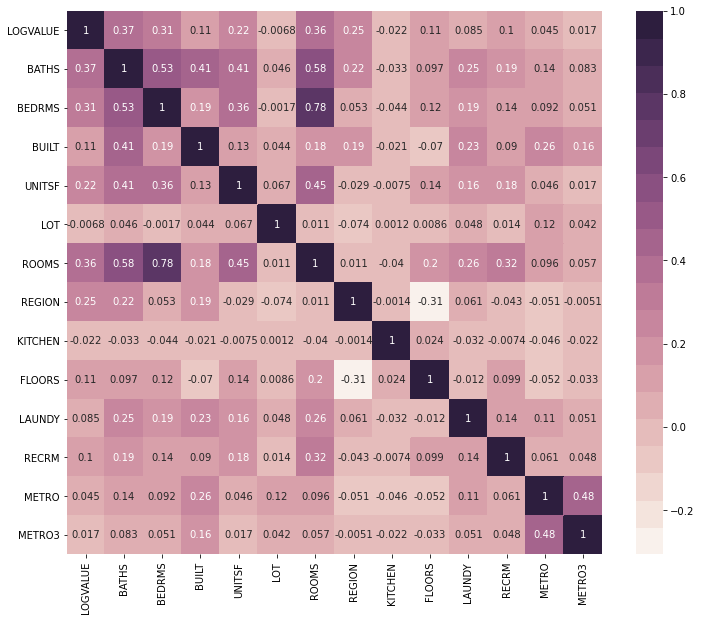

In [13]:
#interaction term?
#BATHS	BEDRMS	BUILT	UNITSF	LOT	ROOMS	REGION	KITCHEN	FLOORS	LAUNDY	RECRM	METRO	METRO3

#first I'll figure out which features might actually be correlated using a correlation matrix 
import seaborn as sns

corr_matrix = dataset.corr()
 
# print(corr_matrix)

plt.figure(figsize=(12,10))
ax=sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(20,  light=0.95, dark=0.15))
ax.xaxis.tick_top
plt.show()


In [14]:
#based on the above correlation matrix, which also follows common sense, it seems that "rooms" "bathrooms" and "bedrooms" are correlated. 
#so we can use an interaction term for these three: 

from patsy import dmatrices

#												
x1 = dataset['BATHS']
x2 = dataset['BEDRMS']
x3 = dataset['BUILT']
x4 = dataset['UNITSF']
x5 = dataset['LOT']
x6 = dataset['ROOMS']
x7 = dataset['REGION']
x8 = dataset['KITCHEN']
x9 = dataset['FLOORS']
x10 = dataset['LAUNDY']
x11 = dataset['RECRM']
x12 = dataset['METRO']
x13 = dataset['METRO3']
yy = dataset['LOGVALUE']
#												

y_interaction, x_interaction = dmatrices('LOGVALUE ~ BATHS + BEDRMS + BUILT + UNITSF + LOT + ROOMS + REGION + KITCHEN + FLOORS + LAUNDY + RECRM + METRO + METRO3 + BATHS:BEDRMS +  BATHS:ROOMS', dataset)
                                    
#run model on these new x and y 
#Lasso Regression 
from sklearn.linear_model import MultiTaskLassoCV

xtrain_set, xvalid_set, ytrain_set, yvalid_set = train_test_split(x_interaction, y_interaction, test_size=0.3, random_state=0)

lasso_cv = MultiTaskLassoCV(cv = 5, random_state = 42).fit(xtrain_set, ytrain_set)
print("Multilasso cv score for train set: ", lasso_cv.score(xtrain_set, ytrain_set))
print("Multilasso cv score for validation set: ", lasso_cv.score(xvalid_set, yvalid_set))

lasso_cv_pred = lasso_cv.predict(xvalid_set)
mse_lassoCv = mean_squared_error(yvalid_set, lasso_cv_pred)
r2_lassoCv = r2_score(yvalid_set, lasso_cv_pred)

print("MSE for MultiLasso CV: ", mse_lassoCv)
print("R2 for MultiLasso CV: ", r2_lassoCv)



Multilasso cv score for train set:  0.1558636891685612
Multilasso cv score for validation set:  0.1325560705502239
MSE for MultiLasso CV:  1.1206622038988343
R2 for MultiLasso CV:  0.1325560705502239


In [15]:
#non-linear term? 
#UNITSF, LOT, FLOORS
y_nl, x_nl = dmatrices('LOGVALUE ~ BATHS + BEDRMS + BUILT + np.log(UNITSF) + np.sin(LOT) + ROOMS + REGION + KITCHEN + np.log(FLOORS) + LAUNDY + RECRM + METRO + METRO3 + BATHS:BEDRMS + BATHS:ROOMS', dataset)

xt1, xv1, yt1, yv1 = train_test_split(x_nl, y_nl, test_size=0.3, random_state=0)

lasso_cv_nl = MultiTaskLassoCV(cv = 5, random_state = 42).fit(xt1, yt1)
print("Multilasso cv _nl score for train set: ", lasso_cv_nl.score(xt1, yt1))
print("Multilasso cv _nl score for validation set: ", lasso_cv_nl.score(xv1, yv1))

lasso_cv_nlpred = lasso_cv_nl.predict(xv1)
mse_lassoCv_nl = mean_squared_error(yv1, lasso_cv_nlpred)
r2_lassoCv_nl = r2_score(yv1, lasso_cv_nlpred)

print("MSE for MultiLasso CV: ", mse_lassoCv_nl)
print("R2 for MultiLasso CV: ", r2_lassoCv_nl)

Multilasso cv _nl score for train set:  0.25678143570990664
Multilasso cv _nl score for validation set:  0.21583255096901532
MSE for MultiLasso CV:  1.0130762252428338
R2 for MultiLasso CV:  0.21583255096901532


In [16]:
# to test models: 
# RSS, SE, RSE, R squared
# Hypothesis testing 

In [17]:
#other checks: 
# Collinearity 
# Heteroscasticidity 
# residuls plots 


# PART 2 - Q2 


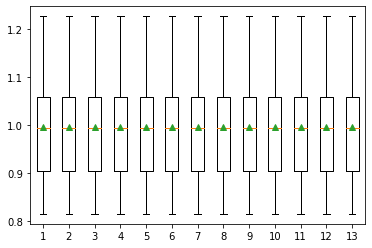

In [18]:
#visualizations 
#visualize the "importance" of each predictor in training dataset 

#from Cell 22 
plt.boxplot(results2, labels = model_names2 , showmeans = True)
plt.show()


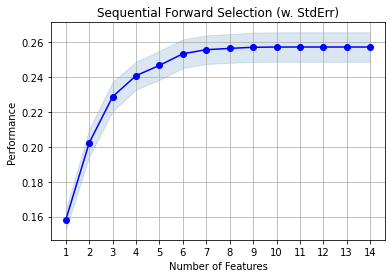

In [23]:
# that didn't really show anything! They're all pretty close. So I'll use another method of feature selection: 
# !pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#which number of features are best: 
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sfs_sample = SFS(lasso_cv_nl, k_features = (1,14), forward = True, scoring = 'r2', cv = 10)
sfs_sample.fit(xt1, yt1)
fig1 = plot_sfs(sfs_sample.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

Based on this figure, it seems like after 9 features performance is not changing. So, we can do it with 8 features. The Performance is "r2" value. The best R2 we are getting is around 0.25, with 9 features. 

In [26]:
df_results = pd.DataFrame.from_dict(sfs_sample.get_metric_dict()).T
df_results

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(15,)","[0.16786569550786534, 0.18687234764650718, 0.1...",0.158146,"(15,)",0.012869,0.017328,0.005776
2,"(7, 15)","[0.21610589674509117, 0.24120874723047736, 0.2...",0.202263,"(7, 15)",0.017389,0.023413,0.007804
3,"(7, 9, 15)","[0.2374504525237937, 0.26322709935954347, 0.24...",0.228744,"(7, 9, 15)",0.018876,0.025415,0.008472
4,"(4, 7, 9, 15)","[0.25061772910406377, 0.2708647678474486, 0.26...",0.240779,"(4, 7, 9, 15)",0.017787,0.023949,0.007983
5,"(4, 6, 7, 9, 15)","[0.25757997873845795, 0.28122558630577277, 0.2...",0.246655,"(4, 6, 7, 9, 15)",0.018473,0.024873,0.008291
6,"(1, 4, 6, 7, 9, 15)","[0.2683536095512823, 0.28014446368084833, 0.28...",0.253323,"(1, 4, 6, 7, 9, 15)",0.018333,0.024684,0.008228
7,"(1, 3, 4, 6, 7, 9, 15)","[0.27473535706118857, 0.280866497164069, 0.287...",0.255647,"(1, 3, 4, 6, 7, 9, 15)",0.0182,0.024504,0.008168
8,"(1, 3, 4, 6, 7, 9, 12, 15)","[0.27475935713933763, 0.282635528856916, 0.288...",0.256391,"(1, 3, 4, 6, 7, 9, 12, 15)",0.018319,0.024665,0.008222
9,"(1, 3, 4, 6, 7, 9, 10, 12, 15)","[0.27659130109881314, 0.2850721021612177, 0.28...",0.257044,"(1, 3, 4, 6, 7, 9, 10, 12, 15)",0.018731,0.02522,0.008407
10,"(1, 3, 4, 6, 7, 9, 10, 12, 13, 15)","[0.27648564029955214, 0.2851552927890465, 0.29...",0.257179,"(1, 3, 4, 6, 7, 9, 10, 12, 13, 15)",0.018794,0.025304,0.008435


In [27]:
#features that should be selected are : (1, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15) based on above results 
#BATHS	BEDRMS	BUILT	UNITSF	LOT	ROOMS	REGION	KITCHEN	FLOORS	LAUNDY	RECRM	METRO	METRO3

def forward_select(x, y, n):
    
    sfs = SFS(Lasso(alpha=0.01), k_features= n, forward=True, floating=False, scoring = 'r2', cv = 10)
    sfs.fit(x, y)
    
    return sfs.k_feature_names_
    

def backward_select(x, y, n):
    
    sbs = SFS(Lasso(alpha=0.01), k_features= n, forward=False, floating=False, cv=10)
    sbs.fit(x, y)
    
    return sbs.k_feature_names_

print('Forwards Selection: ', forward_select(xt1, yt1, 11))
print('Backwards Selection:', backward_select(xt1, yt1, 11))



Forwards Selection:  ('1', '2', '3', '4', '6', '7', '8', '9', '10', '12', '15')
Backwards Selection: ('1', '2', '3', '4', '6', '7', '8', '9', '10', '12', '15')


Exactly the same: BATHS-BEDRMS-BUILT-UNITSF-ROOMS-REGION-KITCHEN-FLOORS-LAUNDY - METRO3


In [29]:
#let's check this model as well: 

y_nl_s, x_nl_s = dmatrices('LOGVALUE ~ BATHS + BEDRMS + BUILT + np.log(UNITSF) + ROOMS + REGION + KITCHEN + np.log(FLOORS) + LAUNDY + METRO3 + ROOMS:BEDRMS', dataset)

xt2, xv2, yt2, yv2 = train_test_split(x_nl_s, y_nl_s, test_size=0.3, random_state=0)

lasso_cv_nl_select = MultiTaskLassoCV(cv = 5, random_state = 42).fit(xt2, yt2)
print("Multilasso cv non linear & 11 features score for train set: ", lasso_cv_nl_select.score(xt2, yt2))
print("Multilasso cv non linear & 11 features score for validation set: ", lasso_cv_nl_select.score(xv2, yv2))

lasso_cv_nlpred_select = lasso_cv_nl_select.predict(xv2)
mse_lassoCv_nl_s = mean_squared_error(yv2, lasso_cv_nlpred_select)
r2_lassoCv_nl_s = r2_score(yv2, lasso_cv_nlpred_select)

print("MSE for MultiLasso CV w/ 11 features: ", mse_lassoCv_nl_s)
print("R2 for MultiLasso CV w/ 11 features: ", r2_lassoCv_nl_s)


Multilasso cv non linear & 11 features score for train set:  0.25826562010269694
Multilasso cv non linear & 11 features score for validation set:  0.21783686757984444
MSE for MultiLasso CV w/ 11 features:  1.0104868222922274
R2 for MultiLasso CV w/ 11 features:  0.21783686757984444


In [34]:
#how to illustrate the importance of each feature using a figure? 
from statsmodels.regression.linear_model import OLS

#first, I will use a summary statistics 
import statsmodels as sm 
from statsmodels.tools.tools import pinv_extended

!pip install cvxopt

mlasso = OLS(yt1, xt1)

result = mlasso.fit_regularized(
                    method = 'sqrt_lasso',
                    L1_wt = 1,
                    start_params = None,
                    profile_scale = False,
                    refit = False,
                    maxiter = 9000,
                    zero_tol = 1e-5,
                    )

pinv_wexog,_ = pinv_extended(mlasso.wexog)
normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))


final = sm.regression.linear_model.OLSResults(mlasso, result.params, normalized_cov_params)
print(final.summary())

p = final.pvalues
t = final.tvalues


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     323.5
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        17:56:10   Log-Likelihood:                -18775.
No. Observations:               13999   AIC:                         3.758e+04
Df Residuals:                   13983   BIC:                         3.770e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0         12.5235      0.700     17.884      0.0

Based on this summary statistics report for my Lasso regression model: 

Model is: 
LOGVALUE ~ BATHS + BEDRMS + BUILT + np.log(UNITSF) + ROOMS + REGION + KITCHEN + np.log(FLOORS) + LAUNDY + METRO3 + ROOMS:BEDRMS 

    1. F-statistic is large, and its p-value is 0 so it's significant. 
    2. variable 0 is clearly the most important 
    3. p-value for var2, var5, var8, var11, and var 14 are all too large 
    4. p-value for var13 is 0.06 which is also too large 
       *** This shows that these variables are not necessary in the model. 
    5. Durbin-Watson is less than 2, which means no autocorrelation 
    6. CI very large, which means there could be multicollinearity but I already added the interaction term 




['LOGVALUE' 'BATHS' 'BEDRMS' 'BUILT' 'UNITSF' 'LOT' 'ROOMS' 'REGION'
 'KITCHEN' 'FLOORS' 'LAUNDY' 'RECRM' 'METRO' 'METRO3']
[ 0  1  5  6  7  8  9 10 11 12  4  2  3]


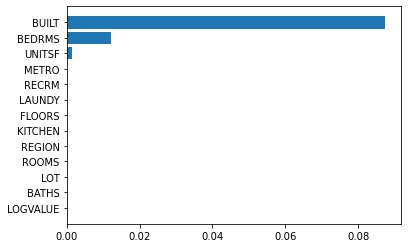

In [63]:
#feature importances visualized 
#since I chose the model with all 13 features, I'll include all 
from sklearn.inspection import permutation_importance

features = np.array(dataset.columns)
print(features)

xst, xste, yt, yte = train_test_split(xs, y, test_size = 0.3, random_state = 1)
model_lasso = LassoCV(cv = 10, random_state = 42).fit(xst, yt)


importance = permutation_importance(model_lasso, xste, yte, n_repeats = 10, random_state = 0)
sorted_indx = np.argsort(importance.importances_mean)
sorted_indx = sorted_indx.astype('int')
print(sorted_indx)

plt.barh(features[sorted_indx], importance.importances_mean[sorted_indx])
plt.show()



According to this visualization; Built, Bedrooms and UNITSF are the most important features. 